In [4]:
import cv2
import numpy as np

image = cv2.imread('images/image.jpg')
#смещение картинки
rows, cols = image.shape[:2]
translation_matrix = np.float32([[1,0,200], [0,1,400]])
image_new = cv2.warpAffine(image, translation_matrix, (cols, rows))

cv2.imwrite('images/image_new.jpg', image_new)

True

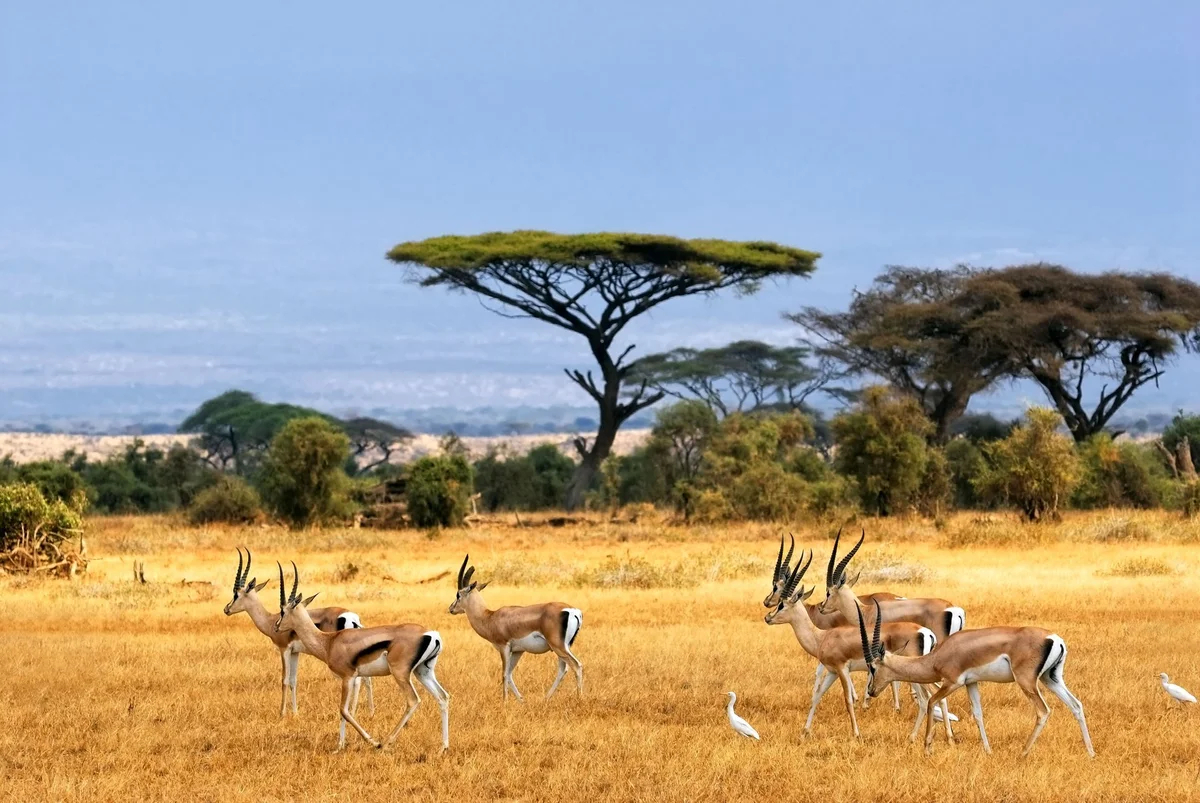
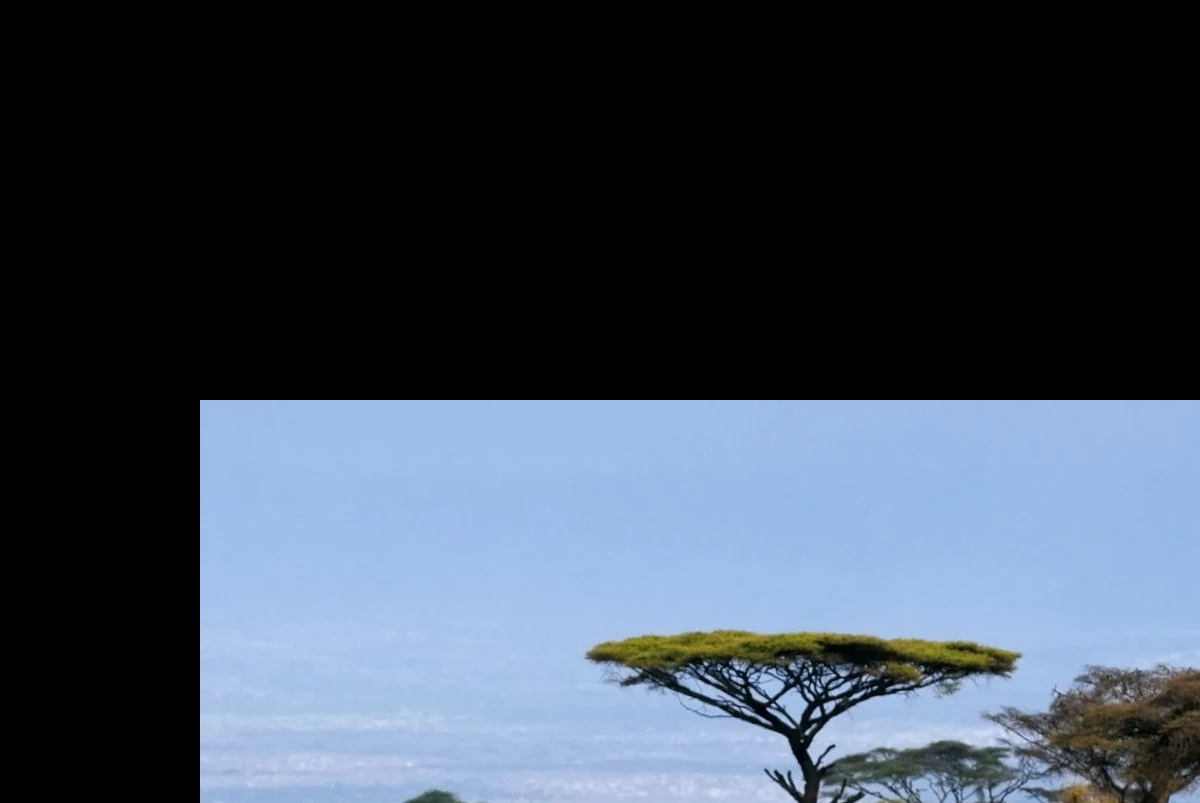

In [81]:
image = cv2.imread('images/image.jpg')
#поворот картинки
rows, cols = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
img_turn = cv2.warpAffine(image, rotation_matrix, (cols, rows))

cv2.imwrite('images/image_turn.jpg', img_turn)

True

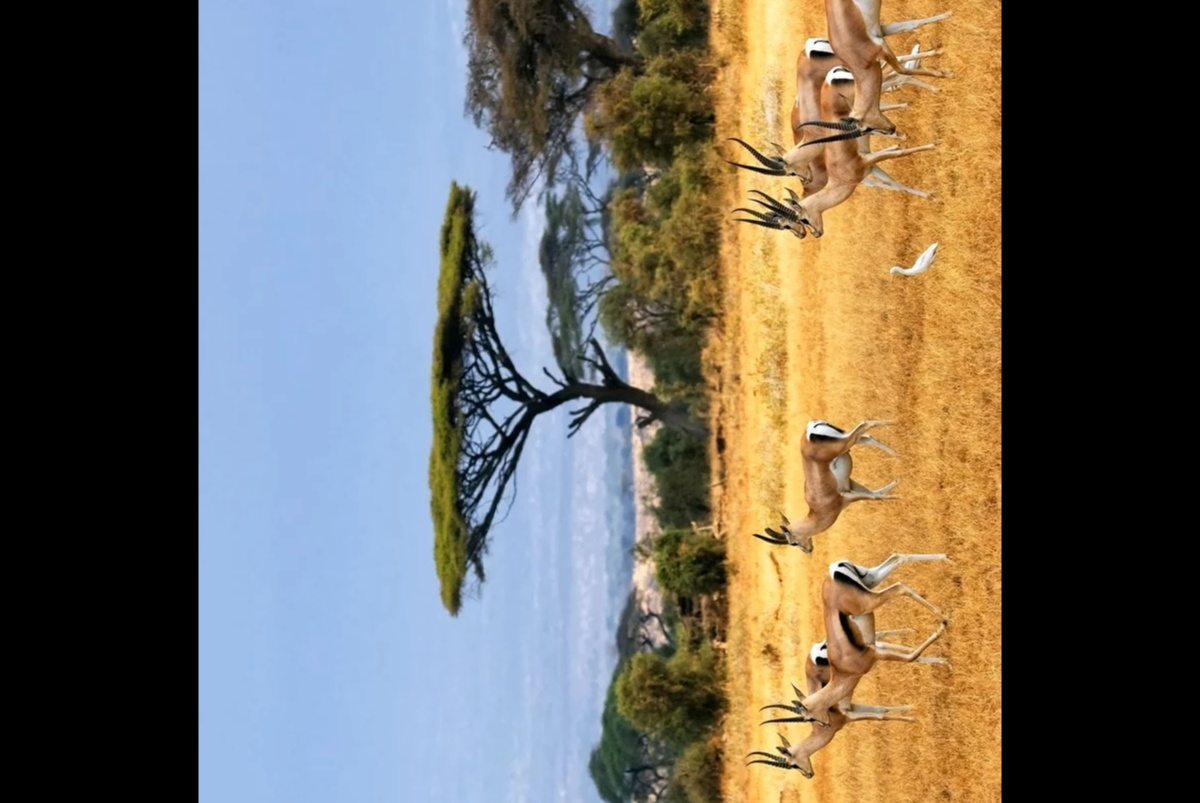

In [83]:
#аффинные 2шт
import numpy as np
image = cv2.imread('images/image.jpg')

rows, cols = image.shape[:2]
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32( [[0,0], [int(0.6*(cols-1)),0], [int(0.4*(cols-1)),rows - 1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(image, affine_matrix, (cols,rows))
cv2.imwrite('images/image_af1.jpg', img_output)

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1]])
dst_points = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
affine_matrix = cv2.getAffineTransform(src_points, dst_points)
img_output = cv2.warpAffine(image, affine_matrix, (cols,rows))
cv2.imwrite('images/image_af2.jpg', img_output)

True

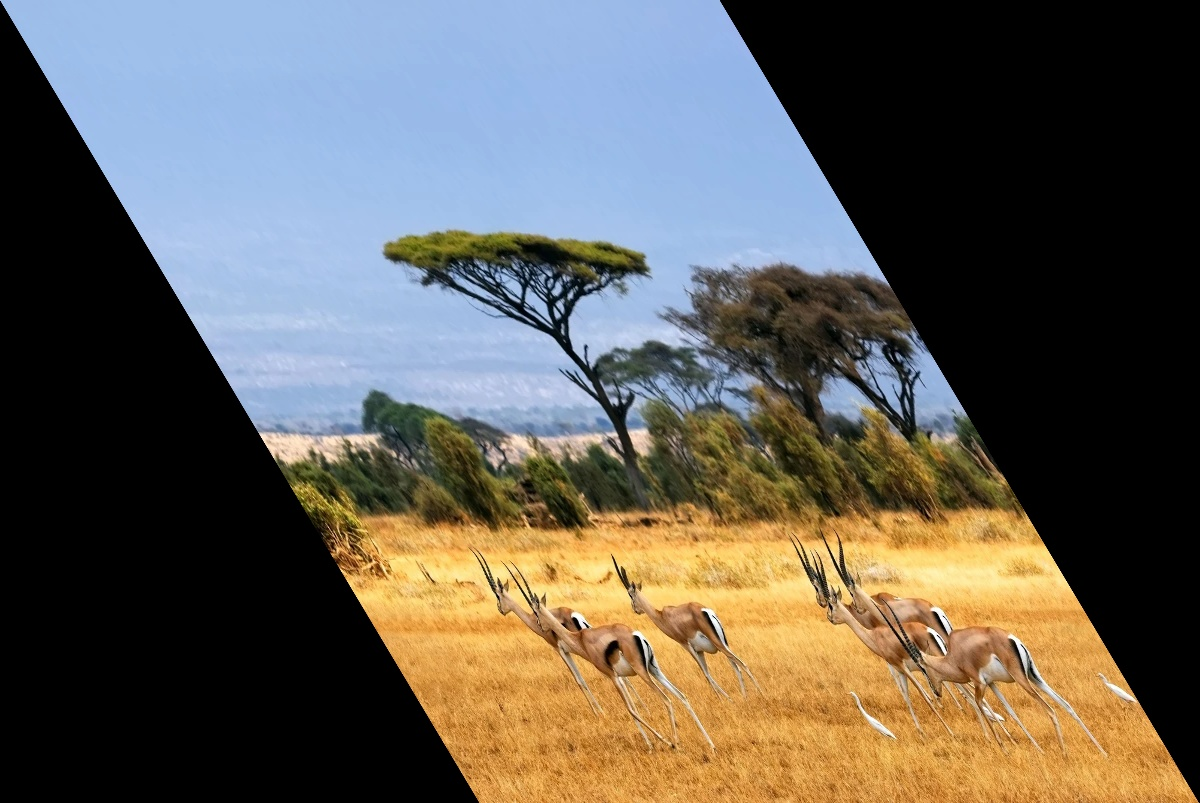
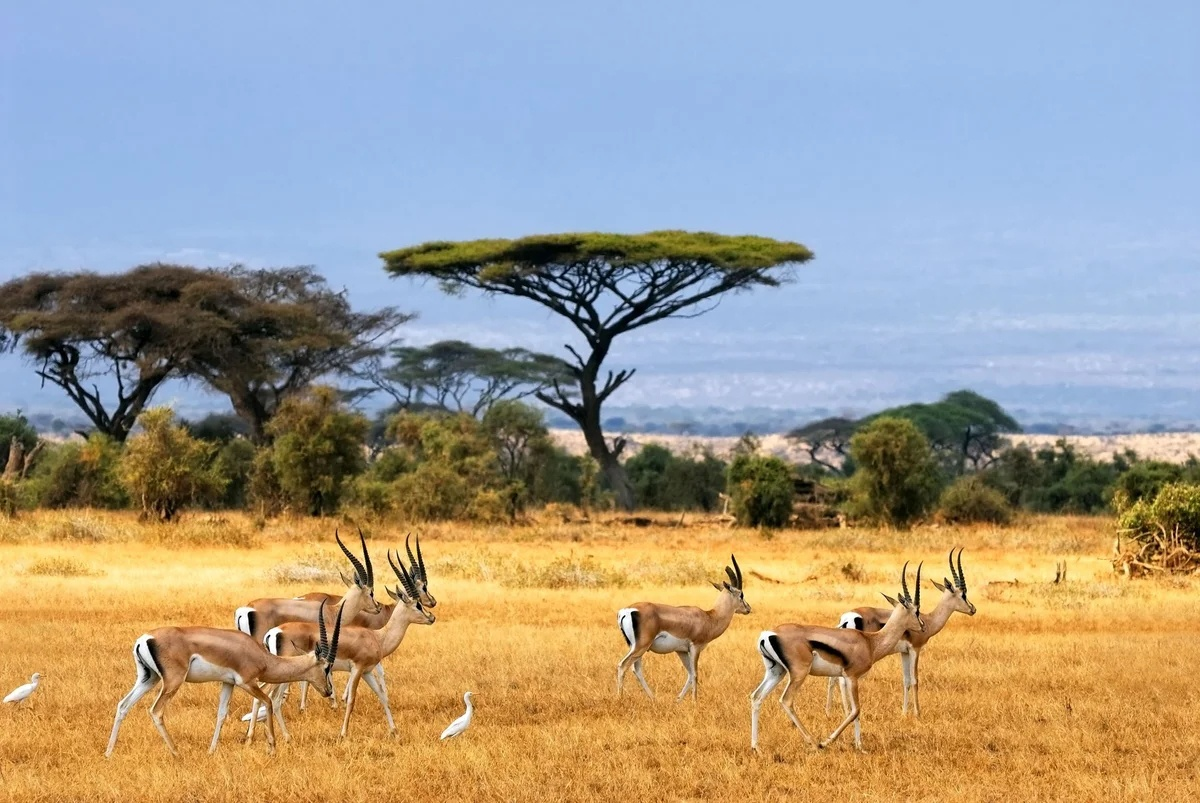

In [28]:
src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(image, projective_matrix, (cols,rows))
cv2.imwrite('images/image_pr1.jpg', img_output)


True

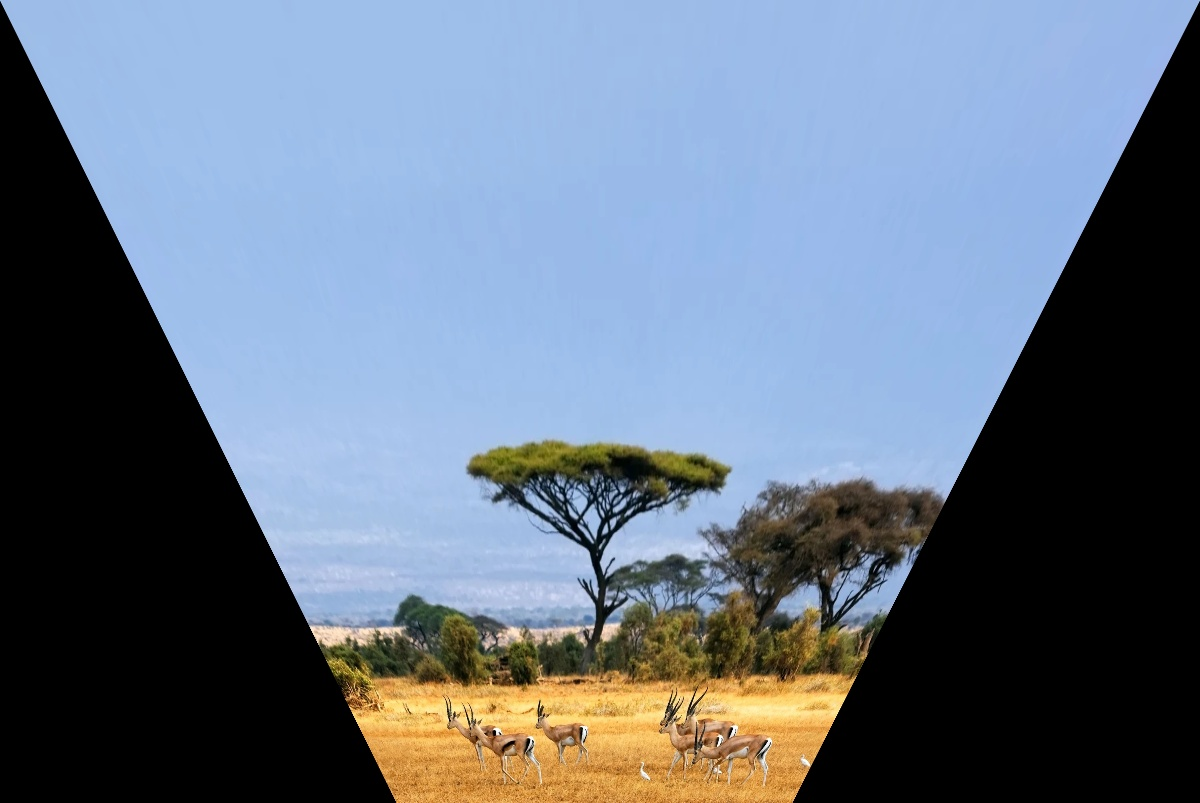

In [ ]:
#image warping
import math
# Vertical wave
img_output = np.zeros(image.shape, dtype=image.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = int(25.0*math.sin(2*3.14*i/180))
        offset_y = 0
        if j+offset_x < rows:
            img_output[i,j] = image[i,(j+offset_x)%cols]
        else:
            img_output[i,j] = 0
cv2.imwrite('images/Vertical_wave.jpg', img_output)
# Horizontal wave
img_output = np.zeros(image.shape, dtype=image.dtype)
for i in range(rows):
    for j in range(cols):
        offset_x = 0
        offset_y = int(16.0*math.sin(2*3.14*j/150))
        if i+offset_y < rows:
            img_output[i,j] = image[(i+offset_y)%rows,j]
        else:
            img_output[i,j] = 0
cv2.imwrite('images/Horizontal_wave.jpg', img_output)

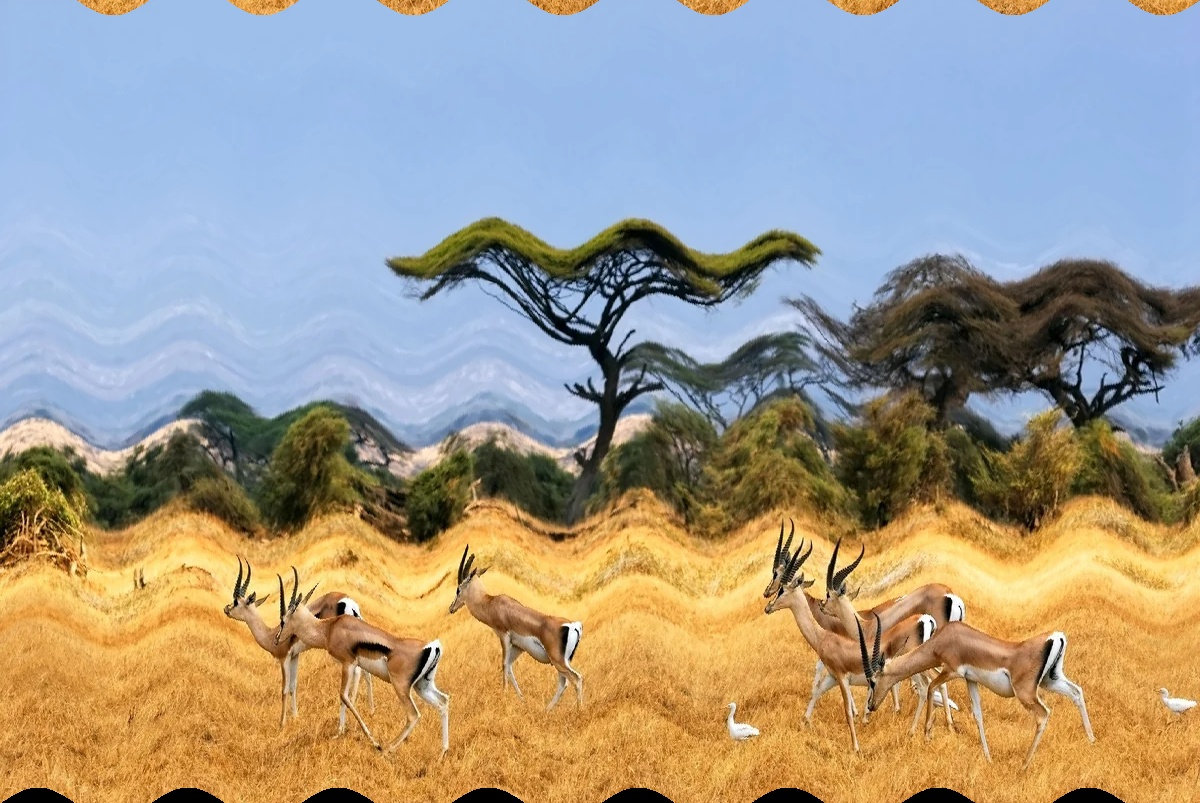

In [ ]:
#4 части
import cv2

image = cv2.imread('images/image.jpg')

part1 = image[0:401, 600:1199]
part2 = image[0:401, 0:599]
part3 = image[402:802, 0:599]
part4 = image[402:802, 600:1199]

#1ая
part1[:, :, 0] = 0

#2ая
num_rows, num_cols = part2.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2,
num_rows/2), 180, 1)
image[0:401, 0:599] = cv2.warpAffine(part2, rotation_matrix,
(num_cols, num_rows))

#3я
part3 += part4

#4ая
image[402:601, 900:1199] = image[200:399, 900:1199]
image[402:601, 600:899] = image[0:199, 0:299]
image[602:802, 600:899] = image[602:802, 0:299]

#рамка
BLUE = [255, 0, 0]
image = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

cv2.imwrite('images/parts.jpg', image)

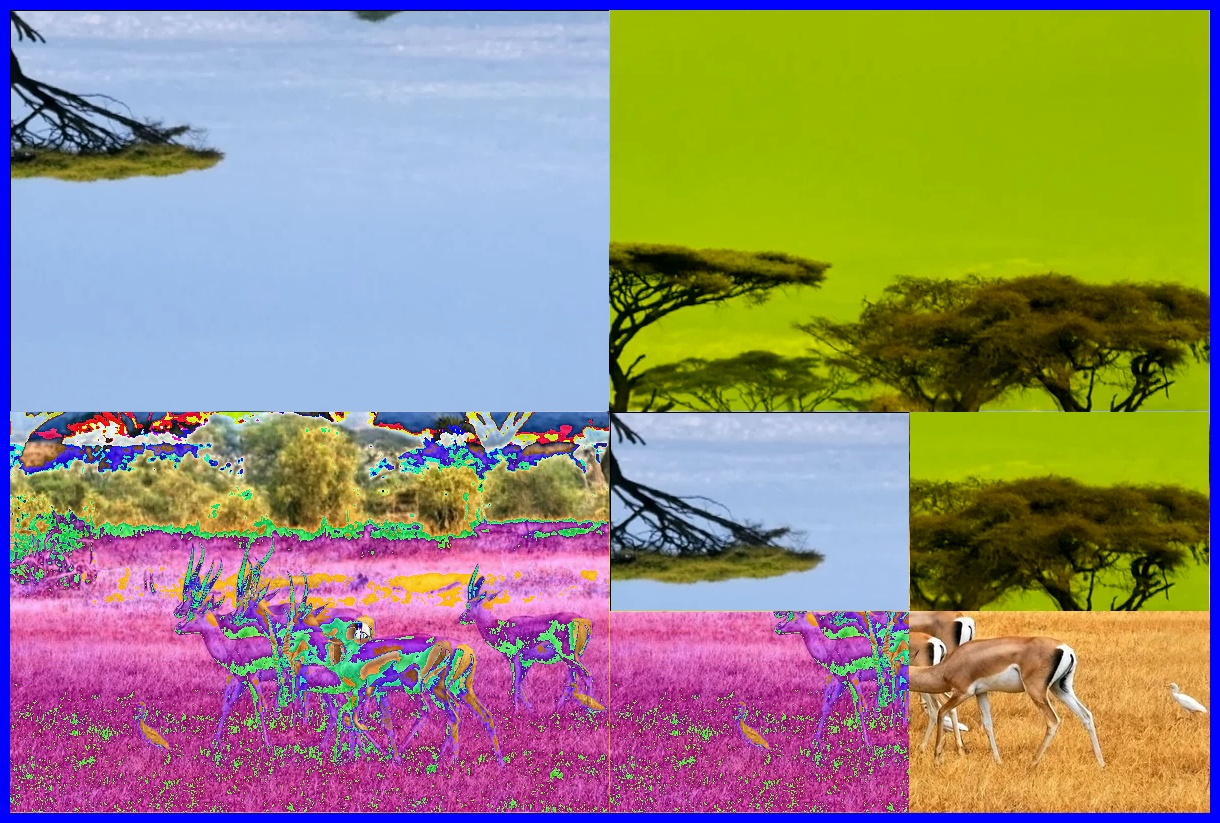

In [5]:
#нарисуем льва
image = cv2.imread('images/image.jpg')

cv2.rectangle(image,(150,700),(300,750),(0,205,255),-1)
cv2.rectangle(image,(150,700),(300,750),(0,205,255),-1)

cv2.circle(image,(339,665), 50, (0,135,255), -1)
cv2.circle(image,(339,665), 30, (0,205,255), -1)

cv2.circle(image,(349,655), 3, (0,0,0), -1)
cv2.circle(image,(329,655), 3, (0,0,0), -1)

cv2.circle(image,(339,665), 6, (0,0,0), -1)
x=22
pts = np.array([[302+x,700-x],[307+x,705-x],[312+x,700-x],[317+x,705-x],[322+x,700-x],[327+x,705-x],[332+x,700-x]])
cv2.polylines(image,[pts],False,(0,0,0), 2)

cv2.ellipse(image,(155,777),(25,10),90,30,180,(0,205,255),-1)
cv2.ellipse(image,(295,777),(25,10),90,30,180,(0,205,255),-1)
cv2.ellipse(image,(165,777),(25,10),90,30,180,(0,205,255),-1)
cv2.ellipse(image,(285,777),(25,10),90,30,180,(0,205,255),-1)

pts = np.array([[144,700],[130,680],[120,710],[100,690]])
cv2.polylines(image,[pts],False,(0,205,255), 3)
cv2.circle(image,(100,690), 6, (0,135,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image,'Lion',(330,780), font, 2, (255,255,255), 3, cv2.LINE_AA)

cv2.imwrite('images/lion.jpg', image)

True

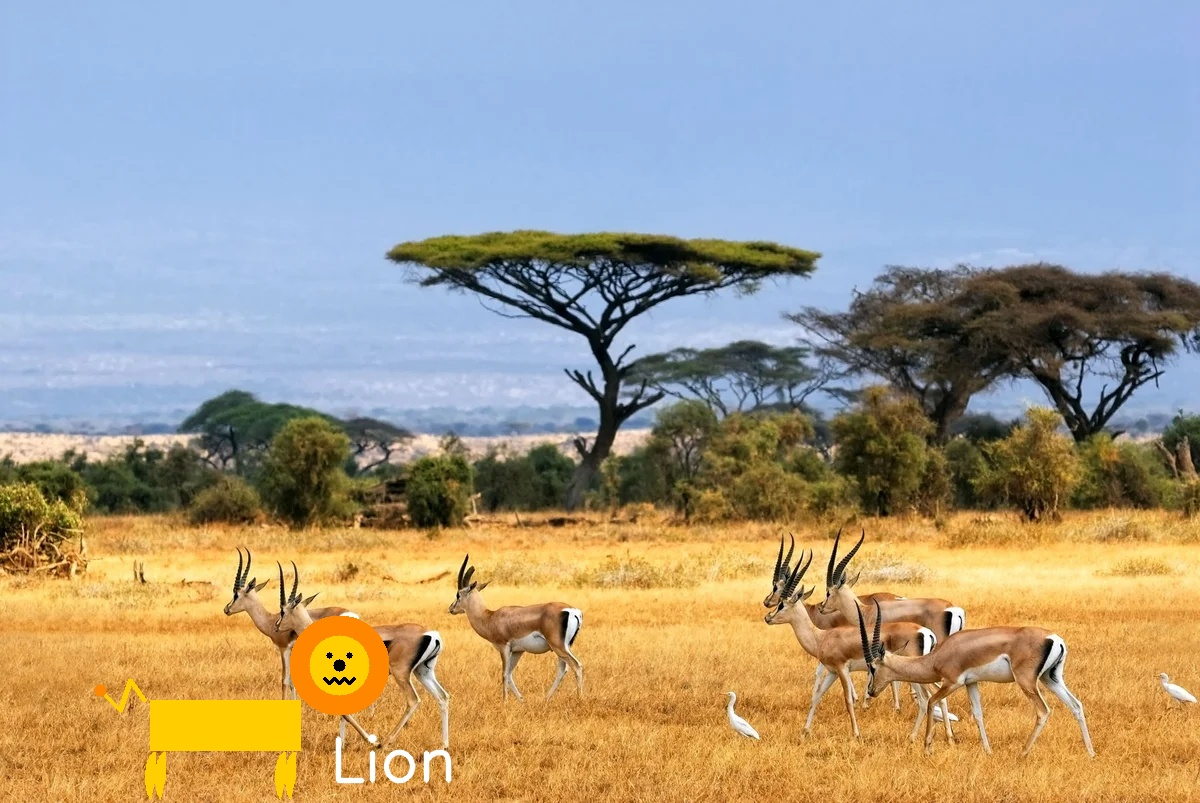